## HOMEWORK CHPTR 5

In [6]:
import pandas as pd

## EX 1

In [22]:
zips_url = 'C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270'

In [25]:
from zipfile import ZipFile
files_name=list()
with ZipFile('chinook.zip', mode='r') as zip:
    zip.extractall()
    for file in zip.infolist():
        files_name.append(file.filename)
        print(file.filename)

chinook.db


In [28]:
import sqlite3
chinook_con = sqlite3.connect('C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\chinook.db') 
chinook_cur = chinook_con.cursor()

In [29]:
chinook_cur.execute('SELECT name FROM sqlite_master WHERE type="table"').fetchall() 

[('albums',),
 ('sqlite_sequence',),
 ('artists',),
 ('customers',),
 ('employees',),
 ('genres',),
 ('invoices',),
 ('invoice_items',),
 ('media_types',),
 ('playlists',),
 ('playlist_track',),
 ('tracks',),
 ('sqlite_stat1',)]

In [31]:
chinook_cur.execute('PRAGMA table_info(customers)').fetchall() 

[(0, 'CustomerId', 'INTEGER', 1, None, 1),
 (1, 'FirstName', 'NVARCHAR(40)', 1, None, 0),
 (2, 'LastName', 'NVARCHAR(20)', 1, None, 0),
 (3, 'Company', 'NVARCHAR(80)', 0, None, 0),
 (4, 'Address', 'NVARCHAR(70)', 0, None, 0),
 (5, 'City', 'NVARCHAR(40)', 0, None, 0),
 (6, 'State', 'NVARCHAR(40)', 0, None, 0),
 (7, 'Country', 'NVARCHAR(40)', 0, None, 0),
 (8, 'PostalCode', 'NVARCHAR(10)', 0, None, 0),
 (9, 'Phone', 'NVARCHAR(24)', 0, None, 0),
 (10, 'Fax', 'NVARCHAR(24)', 0, None, 0),
 (11, 'Email', 'NVARCHAR(60)', 1, None, 0),
 (12, 'SupportRepId', 'INTEGER', 0, None, 0)]

In [41]:
chinook = pd.read_sql_query(
'''SELECT CustomerId, FirstName, LastName, Company, Address, City, State, Country, PostalCode, Phone, Fax, Email, SupportRepID 
FROM customers''',chinook_con)

In [42]:
chinook.head(5)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


## Ex 2

In [2]:
import sqlite3
ind_con = sqlite3.connect('C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\indicators.sqlite') 
ind_cur = ind_con.cursor()

In [3]:
ind_cur.execute('SELECT name FROM sqlite_master WHERE type="table"').fetchall() 

[('Country',),
 ('CountryNotes',),
 ('Series',),
 ('Indicators',),
 ('SeriesNotes',),
 ('Footnotes',)]

In [4]:
ind_cur.execute('PRAGMA table_info(Indicators)').fetchall() 
# Value is numeric

[(0, 'CountryName', 'TEXT', 0, None, 0),
 (1, 'CountryCode', 'TEXT', 0, None, 0),
 (2, 'IndicatorName', 'TEXT', 0, None, 0),
 (3, 'IndicatorCode', 'TEXT', 0, None, 0),
 (4, 'Year', 'INTEGER', 0, None, 0),
 (5, 'Value', 'NUMERIC', 0, None, 0)]

In [10]:
inds = pd.read_sql_query(
'''SELECT CountryName, CountryCode, IndicatorName, IndicatorCode, Year, Value
FROM Indicators''',ind_con)

In [11]:
inds.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Ex 3

In [44]:
data_csv = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'

In [46]:
file = pd.read_csv(data_csv)

In [47]:
file.head(7)

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,NaN,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific
6,4337924420,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,No,No,Yes,Yes,No,Rural,18 - 29,Male,"$25,000 to $49,999",East North Central


## Ex 4

In [49]:
import pyreadstat as py
gss_stata_filename = 'C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\cancer.dta'

In [50]:
gss_empty, gss_meta = py.read_dta(
    gss_stata_filename, 
    metadataonly=True)

In [51]:
print("Number of columns:", gss_meta.number_columns)
print("Number of rows:", gss_meta.number_rows)
print("Column names:", gss_meta.column_names)

Number of columns: 4
Number of rows: 48
Column names: ['studytime', 'died', 'drug', 'age']


In [55]:
col=pd.DataFrame(
    data=gss_meta.column_labels,
    index=gss_meta.column_names,
    columns=['description'])
col

,description
studytime,Months to death or end of exp.
died,1 if patient died
drug,Drug type (1=placebo)
age,Patient's age at start of exp.


In [56]:
gss_data = pd.read_stata(gss_stata_filename,
    columns=['studytime','died','drug','age'])

In [57]:
gss_data.head(8)

,studytime,died,drug,age
0,1,1,1,61
1,1,1,1,65
2,2,1,1,59
3,3,1,1,52
4,4,1,1,56
5,4,1,1,67
6,5,1,1,63
7,5,1,1,58


## Ex 5

In [58]:
zip_path = 'C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\archive (3).zip'

In [59]:
from zipfile import ZipFile
files_name=list()
with ZipFile('archive (3).zip', mode='r') as zip:
    zip.extractall()
    for file in zip.infolist():
        files_name.append(file.filename)
        print(file.filename)

Salaries.csv
database.sqlite


In [63]:
data1_csv = 'C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Salaries.csv'

In [66]:
file = pd.read_csv(data1_csv)
file.head(5)

C:\Users\Seith Sproule\AppData\Local\Temp\ipykernel_1052\2190123718.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(data1_csv)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Ex 6

In [69]:
rugby_data = 'C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\archive (4).zip'
rugby = pd.read_csv(rugby_data)
rugby.head(10)

,date,home_team,away_team,home_score,away_score,competition,stadium,city,country,neutral,world_cup
0,1871-03-27,Scotland,England,1,0,1871 Scotland v England International,Raeburn Place,Edinburgh,Scotland,False,False
1,1872-02-05,England,Scotland,2,1,1871–72 Home Nations International,The Oval,London,England,False,False
2,1873-03-03,Scotland,England,0,0,1872–73 Home Nations International,West of Scotland F.C.,Glasgow,Scotland,False,False
3,1874-02-23,England,Scotland,1,0,1873–74 Home Nations International,The Oval,London,England,False,False
4,1875-02-15,England,Ireland,2,0,1874–75 Home Nations rugby union matches,The Oval,London,England,False,False
5,1875-03-08,Scotland,England,0,0,1874–75 Home Nations International,Raeburn Place,Edinburgh,Scotland,False,False
6,1875-12-13,Ireland,England,0,1,1875–76 Home Nations rugby union matches,Rathmines,Dublin,Ireland,False,False
7,1876-03-06,England,Scotland,1,0,1875–76 Home Nations International,The Oval,London,England,False,False
8,1877-02-05,England,Ireland,2,0,1876–77 Home Nations rugby union matches,The Oval,London,England,False,False
9,1877-02-19,Ireland,Scotland,0,6,1876–77 Home Nations rugby union matches,Ormeau Cricket Ground,Belfast,Ireland,False,False


## Ex 7 

In [77]:
import requests # Python 3.6

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/IFS/M.US.PMP_IX' # adjust codes here

# Navigate to series in API-returned JSON data
data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

print(data['Obs'][-1]) 
# Print lastest observation

{'@TIME_PERIOD': '2020-09', '@OBS_VALUE': '104.745137668391'}


In [ ]:
## Finds the JSON file

In [78]:
import pandas as pd          # pandas version 0.23

baseyr = data['@BASE_YEAR']  # Save the base year

# Create pandas dataframe from the observations
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

df = pd.DataFrame(data_list, columns=['date', 'value'])
     
df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

# Save cleaned dataframe as a csv file
df.to_csv('US_import_price_index.csv', header=True)

In [ ]:
## Creates a DataFrame for the JSON data 

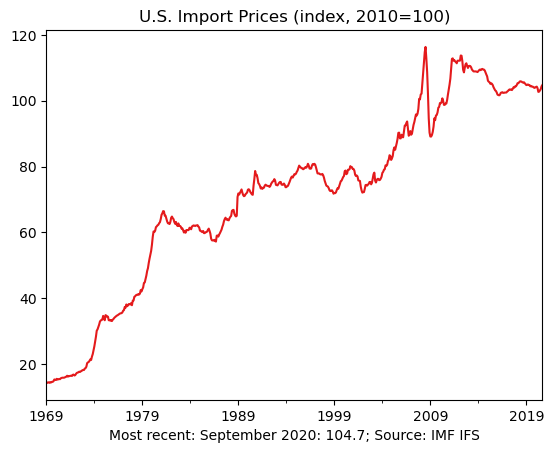

In [79]:
# Title and text with recent value
title = f'U.S. Import Prices (index, {baseyr})'
recentdt = df.index[-1].strftime('%B %Y')
recentval = round(df[-1], 1)
recent = f'Most recent: {recentdt}: {recentval}'
source = 'Source: IMF IFS'

# Basic plot
plot = df.plot(title=title, colormap='Set1')
plot = plot.set_xlabel(f'{recent}; {source}')

In [ ]:
## Graphs the import prices in the US